# MATH 210 Introduction to Mathematical Computing

## March 17, 2023

* Order of Accuracy
* Heun's Method

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Order of Accuracy

Consider a first order differential equation $y' = f(t,y)$, $y(t_0) = y_0$. Choose a step size $h$ and let $y_1 \approx y(t_1)$ be the approximation by one step of a numerical method. The **local truncation error** is $E(h) = |y(h) - y_1|$.

Let's plot the local truncation error for difference step sizes for Euler's method applied to $y' = y$, $y(0)=1$. Since Euler's method is order 1 we expect a line of sploe 2 in the loglog plot $\log E$ versus $\log h$.

In [2]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(t[n],y[n])*(t[n+1] - t[n])
    return y

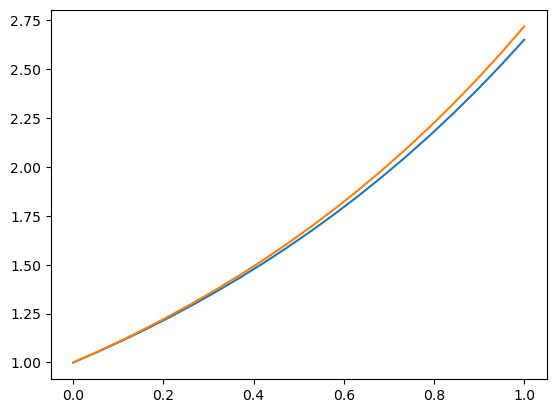

In [3]:
f = lambda t,y: y
y0 = 1
t = np.linspace(0,1,20)
y = odeEuler(f,t,y0)
plt.plot(t,y,t,np.exp(t))
plt.show()

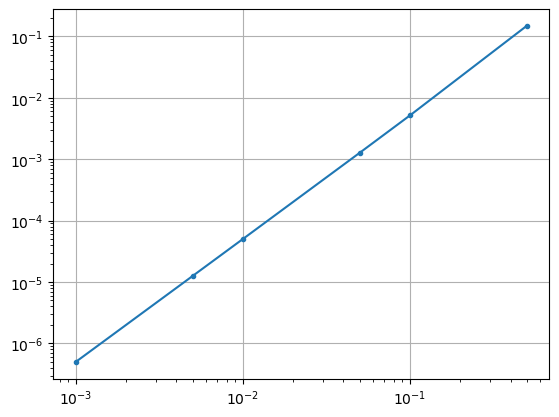

In [4]:
h = [0.001,0.005,0.01,0.05,0.1,0.5]
E = np.zeros(len(h))
f = lambda t,y: y
y0 = 1
for i in range(0,len(h)):
    y = odeEuler(f,[0,h[i]],y0)
    E[i] = np.abs(np.exp(h[i]) - y[1])
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()

## Heun's Method

Heun's method uses the degree 2 Taylor polynomial approxinamtion:

\begin{align*}
h &= t_{n+1} - t_n \\
k_1 &= f(t_n,y_n) \\
k_2 &= f(t_n + h,y_n + k_1 h) \\
y_{n+1} &= y_n + (k_1 + k_2)h/2
\end{align*}

Heun's method is order 2 and we expect $\log E$ versus $\log h$ to have slope 3.

In [5]:
def odeHeun(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n] + h,y[n] + k1*h)
        y[n+1] = y[n] + (k1 + k2)/2*h
    return y

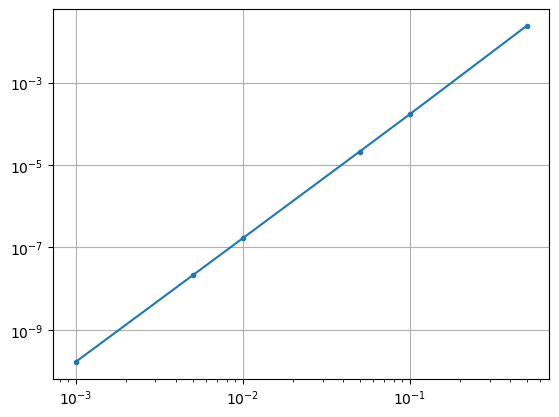

In [6]:
h = [0.001,0.005,0.01,0.05,0.1,0.5]
E = np.zeros(len(h))
f = lambda t,y: y
y0 = 1
for i in range(0,len(h)):
    y = odeHeun(f,[0,h[i]],y0)
    E[i] = np.abs(np.exp(h[i]) - y[1])
plt.loglog(h,E,'.-'), plt.grid(True)
plt.show()